In [17]:
import matplotlib.pyplot as plot

Book Class

1. 4 instance variables. title, author, year, genres = []
2. __str__, __repr__, __eq__ methods

In [18]:
class Book:
    # Create a book.
    def __init__(self, title, author, year, genres):
        self.title = title
        self.author = author
        self.year = year
        self.genres = genres

    def __str__(self):
        return "Title: " + self.title + ", Author: " + self.author + ", Year: " + str(self.year) + ", Genres: " + str(self.genres)

    def __repr__(self):
        return "Title: " + self.title + ", Author: " + self.author + ", Year: " + str(self.year) + ", Genres: " + str(self.genres) + "\n"
    
    def __eq__(self, other):
        if self.title == other.title and self.author == other.author and self.year == other.year and self.genres == other.genres:
            return True
        else:
            return False

Implementation of book class

1. Created 5 books
2. Wrote them to a file
3. Read them from the file and displayed them

In [19]:
file = open("books.txt", "w")
books = []

# Manually create 5 books 
books.append(Book("The Hobbit", "J.R.R. Tolkien", 1937, ["Fantasy", "Adventure"]))
books.append(Book("1984", "George Orwell", 1949, ["Dystopian", "Political Fiction"]))
books.append(Book("The Fellowship of the Ring", "J.R.R. Tolkien", 1954, ["Fantasy", "Adventure"]))
books.append(Book("To Kill a Mockingbird", "Harper Lee", 1960, ["Fiction", "Social Justice"]))
books.append(Book("Brave New World", "Aldous Huxley", 1932, ["Dystopian", "Science Fiction"]))

# Add them to the file
for book in books:
    string = book.title + ", " + book.author + ", " + str(book.year) + ", " + "["
    for genre in book.genres:
        string+=genre + ", "
    
    string = string[:-2]
    string+="]\n"
    file.write(string)

file.close()

file = open("books.txt", "r")

# Read them from the file 
def load_from_file_line(line):
    elements = line.split(",", 3)
    genres = elements[3].strip()[1:-1].split(",")
    for i in range(len(genres)):
        genres[i] = genres[i].strip()

    return Book(elements[0].strip(), elements[1].strip(), int(elements[2].strip()), genres)

booksFromfile = []

# Get the books read from file
for line in file:
    book = load_from_file_line(line)
    booksFromfile.append(book)

file.close()

# Print the books
print(booksFromfile)


[Title: The Hobbit, Author: J.R.R. Tolkien, Year: 1937, Genres: ['Fantasy', 'Adventure']
, Title: 1984, Author: George Orwell, Year: 1949, Genres: ['Dystopian', 'Political Fiction']
, Title: The Fellowship of the Ring, Author: J.R.R. Tolkien, Year: 1954, Genres: ['Fantasy', 'Adventure']
, Title: To Kill a Mockingbird, Author: Harper Lee, Year: 1960, Genres: ['Fiction', 'Social Justice']
, Title: Brave New World, Author: Aldous Huxley, Year: 1932, Genres: ['Dystopian', 'Science Fiction']
]


Library class 

1. 1 instance variable. Library has books. So used composition. Books is a list
2. 10 methods:
    1. add_book - Adding a book
    2. load_books_from_file - Loading books from the file
    3. save_books_to_file - Saving it back to the file
    4. remove_book_by_title - Removing a book
    5. update_book - Update a book
    6. find_books - find the list of books
    7. get_book_counts_by_author - gets the count of books that are written by authors
    8. find_most_published_author - Most pushlished author and their books
    9. suggest_similar_books - similar books by author match and genre match
    10. suggest_similar_books_by_genres - similar books sorted by genre matched
3. __repr__ method

In [20]:
class Library:
    # Library has a list of books, empty at first
    def __init__(self):
        self.Books = []

    # Method to add a book into the library
    def add_book(self, book):
        print("---Adding a new book to the library---")
        self.Books.append(book)
        print("Book with the info " + book.__str__() + " successfully added to the library\n")

    # Method to load a list of books into the library from a file
    def load_books_from_file(self, file):
        print("---Loading book from a file---")
        fileHandle = open(file, "r")

        for line in fileHandle:
            elements = line.split(",", 3)
            genres = elements[3].strip()[1:-1].split(",")
            for i in range(len(genres)):
                genres[i] = genres[i].strip()

            self.Books.append(Book(elements[0].strip(), elements[1].strip(), int(elements[2].strip()), genres))
        
        print("Books loaded from the file\n")

    # Method to save any the list of books into the file
    def save_books_to_file(self, file):
        print("---Saving books to file---")
        fileHandle = open(file, "w")
        string = ""
        for book in self.Books:
            string+= book.title + ", " + book.author + ", " + str(book.year) + ", " + "["
            for genre in book.genres:
                string+=genre + ", "
            
            string = string[:-2]
            string+="]\n"
        fileHandle.write(string)
        print("Books saved to the file\n")

    # Method to remove a book from the library
    def remove_book_by_title(self, title):
        print("---Removing a book from the library---")
        for i in range(len(self.Books)):
            if self.Books[i].title == title:
                self.Books.pop(i)
                print("Book with the title " + title + " is removed from the library\n")
                break
        else:
            print("Book not found\n")

    # Method to update the details of a book. Assumed the title to be the primary key here and its cannot be changed
    def update_book(self, title, new_author = None, new_year = None, new_genres = None):
        print("---Updating a book in the library---")
        for i in range(len(self.Books)):
            if self.Books[i].title == title:
                if new_author != None : self.Books[i].author = new_author
                if new_year != None : self.Books[i].year = new_year
                if new_genres != None : self.Books[i].genres = new_genres
                print("Book with the title " + title + " is updated\n")
                break
        else:
            print("Book not found\n")

    # Method to find list of books
    def find_books(self, title = None, author = None, year = None, genre = None):
        print("---Searching for the specified book in the library---")
        foundBooks = []
        for book in self.Books:
            if (title != None and book.title == title) or (author != None and book.author == author) or (year != None and book.year == year) or (genre != None and book.genre == genre):
                foundBooks.append(book)

        if len(foundBooks) == 0 : return "No books found\n" 
        else : return foundBooks

    # Method to get the count of books by the author who wrote it
    def get_book_counts_by_author(self):
        print("\n---Getting the books count by authors---")
        author_counts = {}
        for book in self.Books:
            if book.author not in author_counts:
                author_counts[book.author] = 1
            else:
                author_counts[book.author]+=1

        return author_counts
    
    # Method to find the most pushlished author
    def find_most_published_author(self):
        author_count = self.get_book_counts_by_author()
        highest = []
        for keys, values in author_count.items():
            if values == max(author_count.values()):
                highest.append((keys, values))
        
        print("Highest published authors : ", highest)

        for author, count in highest:
            string = "\nBooks Published by " + author + "\n" 
            for book in self.Books:
                if book.author == author:
                    string+=book.title + "\n"
            print(string)

    # Method to suggest similar books. This method will first suggest based on author match and then by genre match
    def suggest_similar_books(self, book_name):
        print("---Suggesting similar books---")
        for book in self.Books:
            if (book_name != None and book.title.lower() == book_name.lower()):
                givenBook = book

        similarBooks = []

        for book in self.Books:
            if givenBook != book:
                for genre in givenBook.genres:
                    if genre in book.genres and book not in similarBooks:
                        similarBooks.append(book)
                        break
                    
        if len(similarBooks) == 0 : return "No similar books found"
        else : return similarBooks

    # Method to suggest similar books. This method only gives suggestions based on the number of genres that are matching with another book
    def suggest_similar_books_by_genres(self, book_name):
        print("---Suggesting similar books---")
        for book in self.Books:
            if (book_name != None and book.title.lower() == book_name.lower()):
                givenBook = book

        similarBooks = []

        result = {}
        for book in self.Books:
            if givenBook != book:
                for genre in givenBook.genres:
                    if genre in book.genres:
                        if book.title not in result:
                            result[book.title] = 1
                        else:
                            result[book.title]+=1

        result = list(result.items())
        result.sort(key=lambda item: item[1], reverse=True)
        
        return result
     
    def __str__(self):
        if len(self.Books) == 0:
            return "The library is empty"
        else:
            return "---------Books in the library--------\n" + self.Books.__repr__() + "\n"

Creating a library

In [21]:
# Creating a library
library = Library()

# Checking that the library is empty
print(library)

The library is empty


Adding a new book to the library

In [22]:
# Adding a new book to the library
library.add_book(Book('Harry Potter', 'J.k Rowling', 2001, ['Adventure', 'Magic']))

# Checking that the book got added
print(library)

---Adding a new book to the library---
Book with the info Title: Harry Potter, Author: J.k Rowling, Year: 2001, Genres: ['Adventure', 'Magic'] successfully added to the library

---------Books in the library--------
[Title: Harry Potter, Author: J.k Rowling, Year: 2001, Genres: ['Adventure', 'Magic']
]



Loading books from a file

In [23]:
# Loading books from a file
library.load_books_from_file("books.txt")

# Checking books for added
print(library)

---Loading book from a file---
Books loaded from the file

---------Books in the library--------
[Title: Harry Potter, Author: J.k Rowling, Year: 2001, Genres: ['Adventure', 'Magic']
, Title: The Hobbit, Author: J.R.R. Tolkien, Year: 1937, Genres: ['Fantasy', 'Adventure']
, Title: 1984, Author: George Orwell, Year: 1949, Genres: ['Dystopian', 'Political Fiction']
, Title: The Fellowship of the Ring, Author: J.R.R. Tolkien, Year: 1954, Genres: ['Fantasy', 'Adventure']
, Title: To Kill a Mockingbird, Author: Harper Lee, Year: 1960, Genres: ['Fiction', 'Social Justice']
, Title: Brave New World, Author: Aldous Huxley, Year: 1932, Genres: ['Dystopian', 'Science Fiction']
]



Removing a book

In [24]:
# Removing a book
library.remove_book_by_title("To Kill a Mockingbird")

# Checking if the book got deleted
print(library)

---Removing a book from the library---
Book with the title To Kill a Mockingbird is removed from the library

---------Books in the library--------
[Title: Harry Potter, Author: J.k Rowling, Year: 2001, Genres: ['Adventure', 'Magic']
, Title: The Hobbit, Author: J.R.R. Tolkien, Year: 1937, Genres: ['Fantasy', 'Adventure']
, Title: 1984, Author: George Orwell, Year: 1949, Genres: ['Dystopian', 'Political Fiction']
, Title: The Fellowship of the Ring, Author: J.R.R. Tolkien, Year: 1954, Genres: ['Fantasy', 'Adventure']
, Title: Brave New World, Author: Aldous Huxley, Year: 1932, Genres: ['Dystopian', 'Science Fiction']
]



Updating a book

In [25]:
# Updating a book
library.update_book("Harry Potter", new_author="Aadhithya", new_year = 2024)

# Proving the book got updated
print(library)

---Updating a book in the library---
Book with the title Harry Potter is updated

---------Books in the library--------
[Title: Harry Potter, Author: Aadhithya, Year: 2024, Genres: ['Adventure', 'Magic']
, Title: The Hobbit, Author: J.R.R. Tolkien, Year: 1937, Genres: ['Fantasy', 'Adventure']
, Title: 1984, Author: George Orwell, Year: 1949, Genres: ['Dystopian', 'Political Fiction']
, Title: The Fellowship of the Ring, Author: J.R.R. Tolkien, Year: 1954, Genres: ['Fantasy', 'Adventure']
, Title: Brave New World, Author: Aldous Huxley, Year: 1932, Genres: ['Dystopian', 'Science Fiction']
]



Saving the data back to the file. File serves like a database in this situation

In [26]:
# Saving the data back to the file. File serves like a database in this situation
library.save_books_to_file("books.txt")

---Saving books to file---
Books saved to the file



Searching for a book

In [27]:
# Searching for a book
print(library.find_books(title = "The Hobbit"))

---Searching for the specified book in the library---
[Title: The Hobbit, Author: J.R.R. Tolkien, Year: 1937, Genres: ['Fantasy', 'Adventure']
]


Getting the books count by authos

In [28]:
# Getting the books count by authos
print(library.get_book_counts_by_author())


---Getting the books count by authors---
{'Aadhithya': 1, 'J.R.R. Tolkien': 2, 'George Orwell': 1, 'Aldous Huxley': 1}


A bar chart showing the number of books written by each author
refered this documentation : https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py



---Getting the books count by authors---


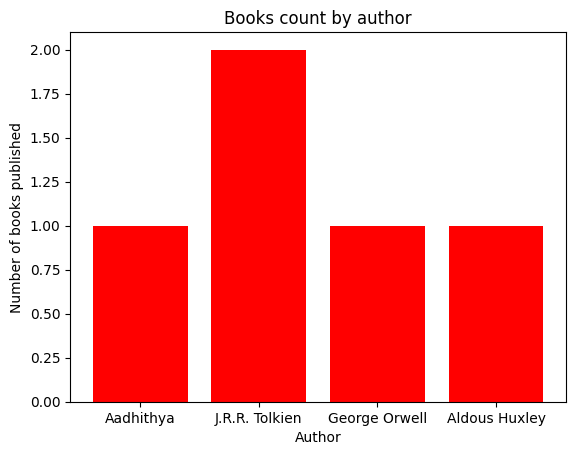

In [29]:
counts = library.get_book_counts_by_author()
fig, ax = plot.subplots()

authors = counts.keys()
counts = counts.values()
ax.bar(authors, counts, color = 'red')

ax.set_xlabel("Author")
ax.set_ylabel("Number of books published")
ax.set_title("Books count by author")

plot.show()

Gives the highest pushlished author and their books. If there are 2 authors with the same count, All of them will be printed

In [30]:
# Gives the highest pushlished author and their books. If there are 2 authors with the same count, All of them will be printed
library.find_most_published_author()


---Getting the books count by authors---
Highest published authors :  [('J.R.R. Tolkien', 2)]

Books Published by J.R.R. Tolkien
The Hobbit
The Fellowship of the Ring



Suggest similar books. First based on author and then based on genres

In [31]:
# Suggest similar books. First based on author and then based on genres
suggestions = library.suggest_similar_books("The hobbit")

print(suggestions)

---Suggesting similar books---
[Title: Harry Potter, Author: Aadhithya, Year: 2024, Genres: ['Adventure', 'Magic']
, Title: The Fellowship of the Ring, Author: J.R.R. Tolkien, Year: 1954, Genres: ['Fantasy', 'Adventure']
]


Suggest similar books based on the number of genres matched

In [32]:
# Suggest similar books based on the number of genres matched
suggestions = library.suggest_similar_books_by_genres("The hobbit")

for book, genresMatch in suggestions:
    print(book + " is similar to the book you searched with " + str(genresMatch) + " genre matched")

---Suggesting similar books---
The Fellowship of the Ring is similar to the book you searched with 2 genre matched
Harry Potter is similar to the book you searched with 1 genre matched
